<div class="alert alert-block alert-success">
    <h2>사건의 정보량(information content) I(x)</h2>
</div>

* $P(X=x)$ 일때 $I(x)=−logbP(x)$
|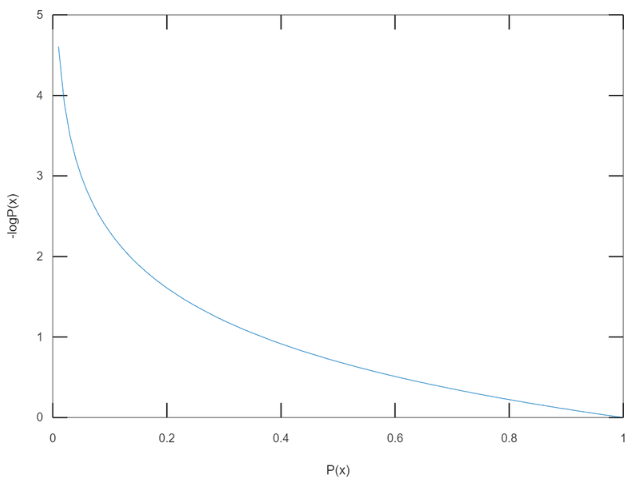|
|--|

In [1]:
import numpy as np
import math
import random

# 주머니 속에 들어있는 공의 개수입니다. 숫자를 바꾸면서 실험해보세요!
total = 1000

#---------------#

count = 1   # 실험이 끝날 때까지 꺼낸 공의 개수

# 1부터 total까지의 정수 중에서 하나를 뽑고 total과 같으면 실험 종료
# total=1000인 경우 1~999: blue / 1000: red
while True:
    sample = random.randrange(1,total+1)
    if sample == total:
        break
    count += 1

print('number of blue samples: '+str(count-1))
print('information content: '+str(-math.log(1/count)))

number of blue samples: 956
information content: 6.863803391452954


<div class="alert alert-block alert-success">
    <h2>엔트로피(Entropy) : 사건들의 정보량의 기댓값</h2>
</div>

|이산확률분포|연속확률분포|
|:--:|:--:|
|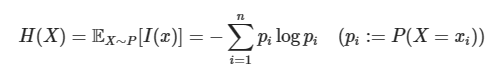|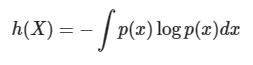|

<div class="alert alert-block alert-success">
    <h2>Kullback Leibler Divergence : 두 확률 분포의 차이를 나타내는 지표</h2>
</div> 

* True값 확률 분포 : $P(x)$
* pred값 확률 분포 : $Q(x)$
* 두 확률 분포의 KL divergence
    - P(x)기준으로 계산된 Q(x)의 평균과 P(x)의 평균의 차이
    - P(x) 대신 Q(x)일 때 엔트로피 변화량
|이산확률분포|연속확률분포|
|:--:|:--:|
|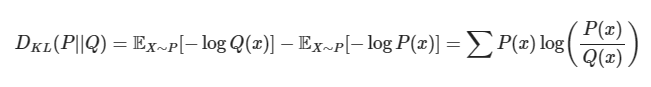|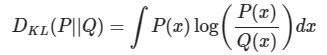|


* $D_{KL}(P||Q)$ 의 최소화
|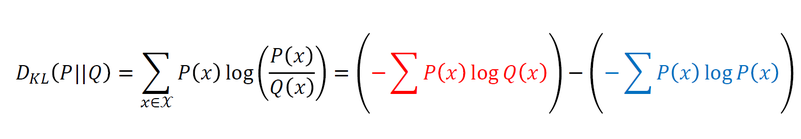|
|--|

에서 빨간부분을 최척화해야하고 이 값은 `P(x)에대한 Q(x)의 교차 엔트로피(Cross Entropy)`가 됩니다.

<div class="alert alert-block alert-success">
    <h2>Cross Entropy Loss</h2>
</div> 

<center>Cross Entropy</center>

|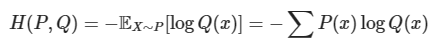|
|--|

<center>다중분류 Sotfmax() 의 결과값</center>

|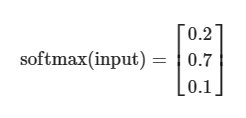|
|--|

|P(x)|Q(x)|
|:--:|:--:|
|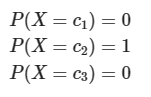|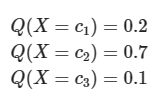|


<center>H(P,Q)</center>

|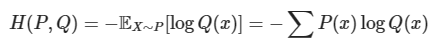|
|--|

In [4]:
import numpy as np
import random

# generate random output
#-----------------#
# can be modified
class_num = 4
#-----------------#
q_vector = []
total = 1

for i in range(class_num-1):
    q = random.uniform(0,total)
    q_vector.append(round(q,3))
    total = total - q

q_vector.append(total)
softmax_output = np.array(q_vector)

print(softmax_output)

[0.114      0.552      0.249      0.08474433]


In [5]:
#-----------------#
# can be modified
class_index = 3
#-----------------#

p_vector = np.zeros(class_num)
p_vector[class_index-1] = 1

cross_entropy = -np.sum(np.multiply(p_vector, np.log(softmax_output)))

print('model prediction: '+str(softmax_output))
print('data label: '+str(p_vector))
print('cross entropy: '+str(round(cross_entropy,4)))

model prediction: [0.114      0.552      0.249      0.08474433]
data label: [0. 0. 1. 0.]
cross entropy: 1.3903


<div class="alert alert-block alert-success">
    <h2>Decision Tree & Cross Entropy</h2>
</div> 

In [6]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics

In [7]:
import os
csv_path = '../data/fundamental/diabetes.csv'

col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
df = pd.read_csv(csv_path, header=0, names=col_names)
df.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
# 데이터셋 준비
feature_cols = ['pregnant', 'insulin', 'bmi', 'age', 'glucose', 'bp', 'pedigree']
X = df[feature_cols] # Features
y = df.label # Target variable

print(X.shape, y.shape)
print("X sample :\n", X[:10])
print("y sample :\n", y[:10])

(768, 7) (768,)
X sample :
    pregnant  insulin   bmi  age  glucose  bp  pedigree
0         6        0  33.6   50      148  72     0.627
1         1        0  26.6   31       85  66     0.351
2         8        0  23.3   32      183  64     0.672
3         1       94  28.1   21       89  66     0.167
4         0      168  43.1   33      137  40     2.288
5         5        0  25.6   30      116  74     0.201
6         3       88  31.0   26       78  50     0.248
7        10        0  35.3   29      115   0     0.134
8         2      543  30.5   53      197  70     0.158
9         8        0   0.0   54      125  96     0.232
y sample :
 0    1
1    0
2    1
3    0
4    1
5    0
6    1
7    0
8    1
9    1
Name: label, dtype: int64


In [11]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [12]:
# Decision Tree  모델 학습
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.683982683982684


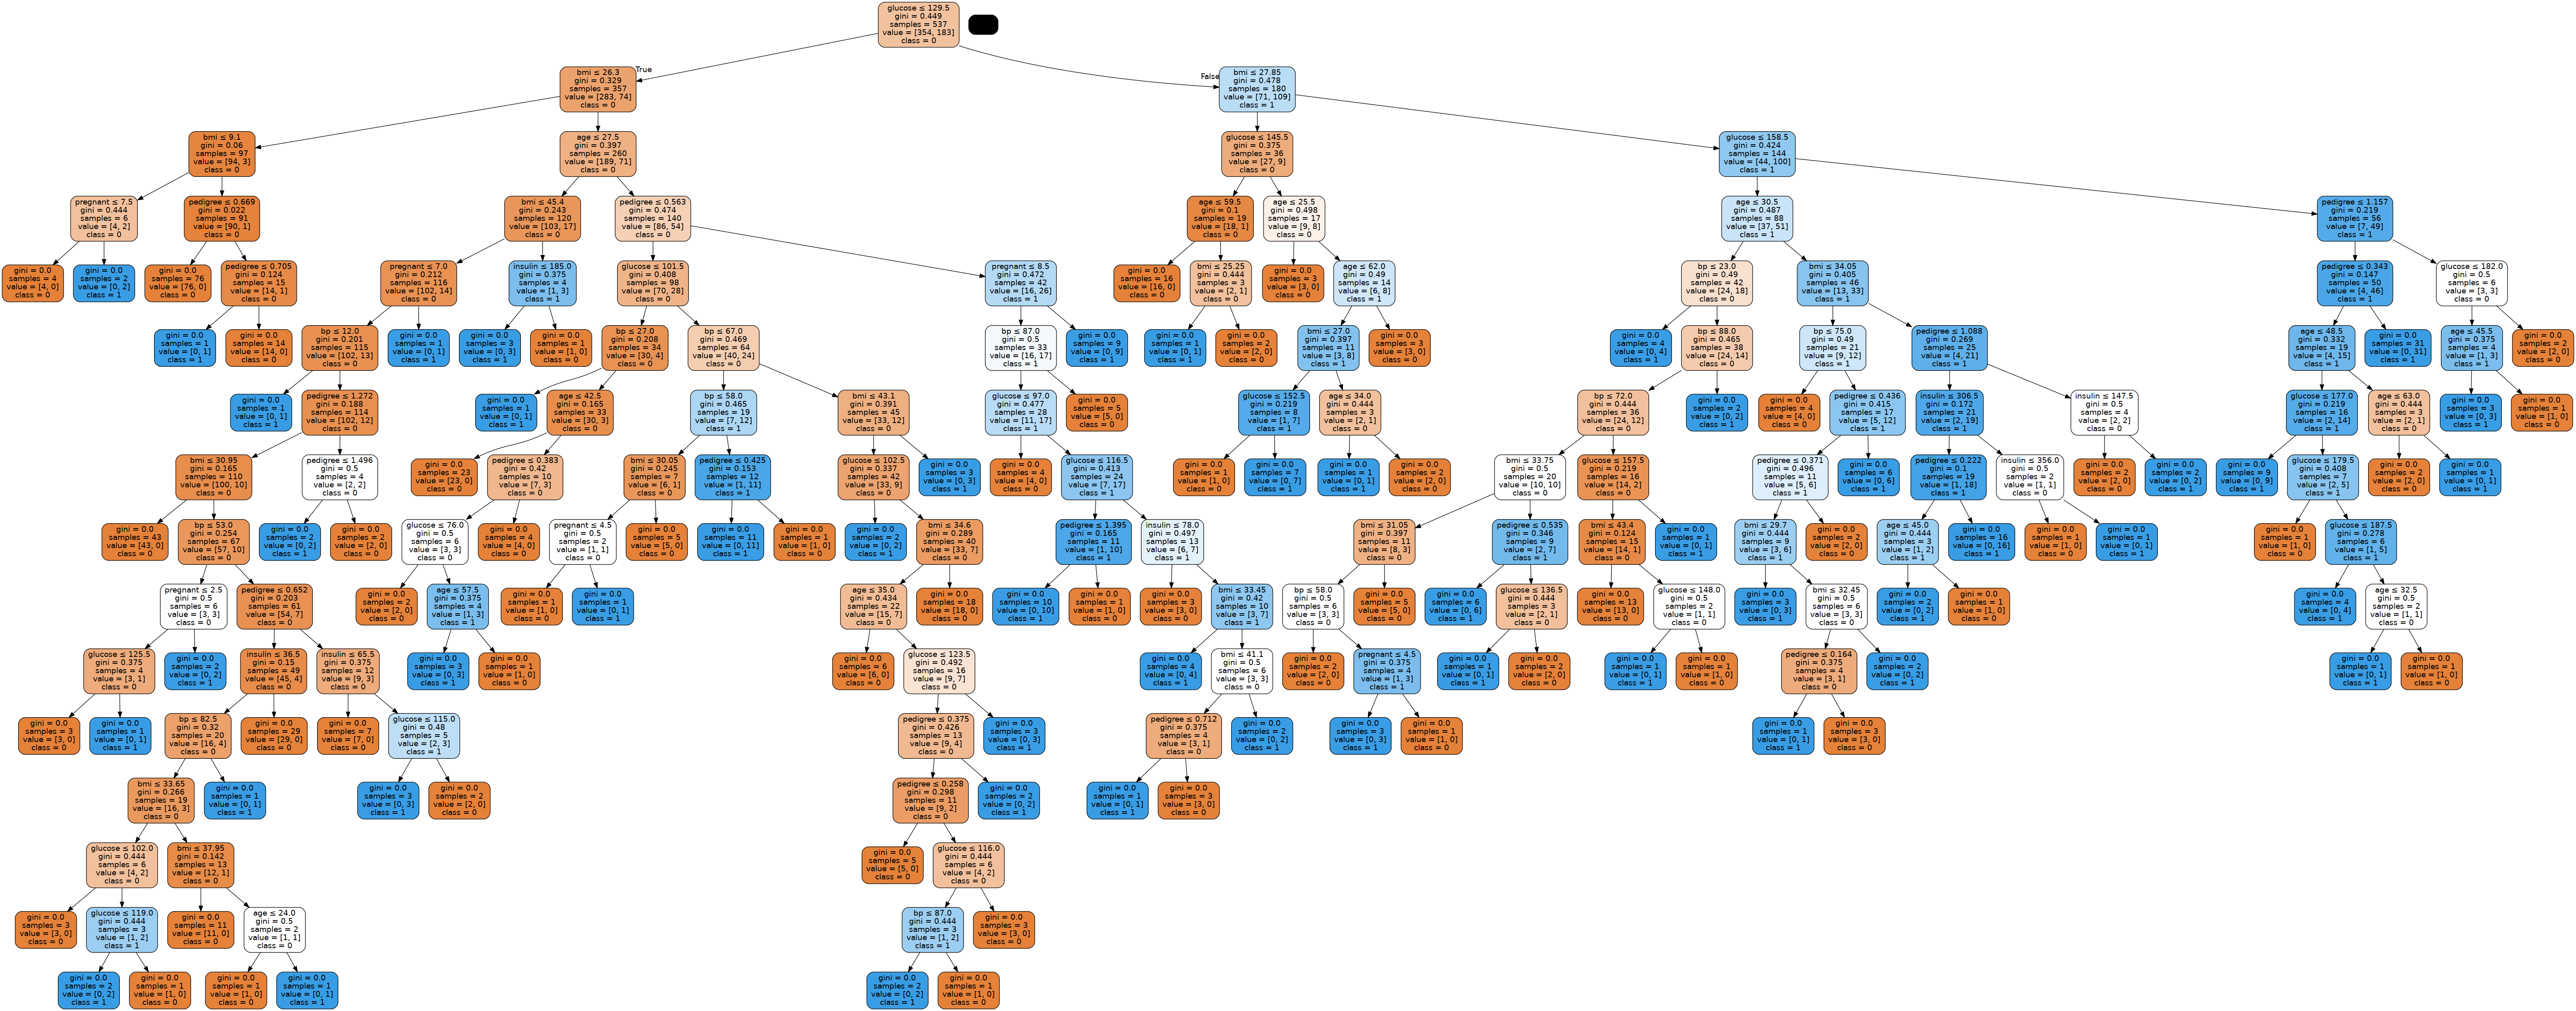

In [17]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, 
                out_file=dot_data,  
                filled=True, 
                rounded=True,
                special_characters=True, 
                feature_names=feature_cols, 
                class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png(), retina=True)

In [18]:
# 정보 이득이 되지 않고 남은 Impurity  총량 측정
ccp_path1 = clf.cost_complexity_pruning_path(X_train,y_train)
ccp_path2 = clf.cost_complexity_pruning_path(X_test,y_test)
print(np.mean(ccp_path1.impurities))
print(np.mean(ccp_path2.impurities))

0.15530329652426622
0.14463309851254125


In [19]:
# max_depth=3 일 때 
clf = DecisionTreeClassifier(max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7575757575757576


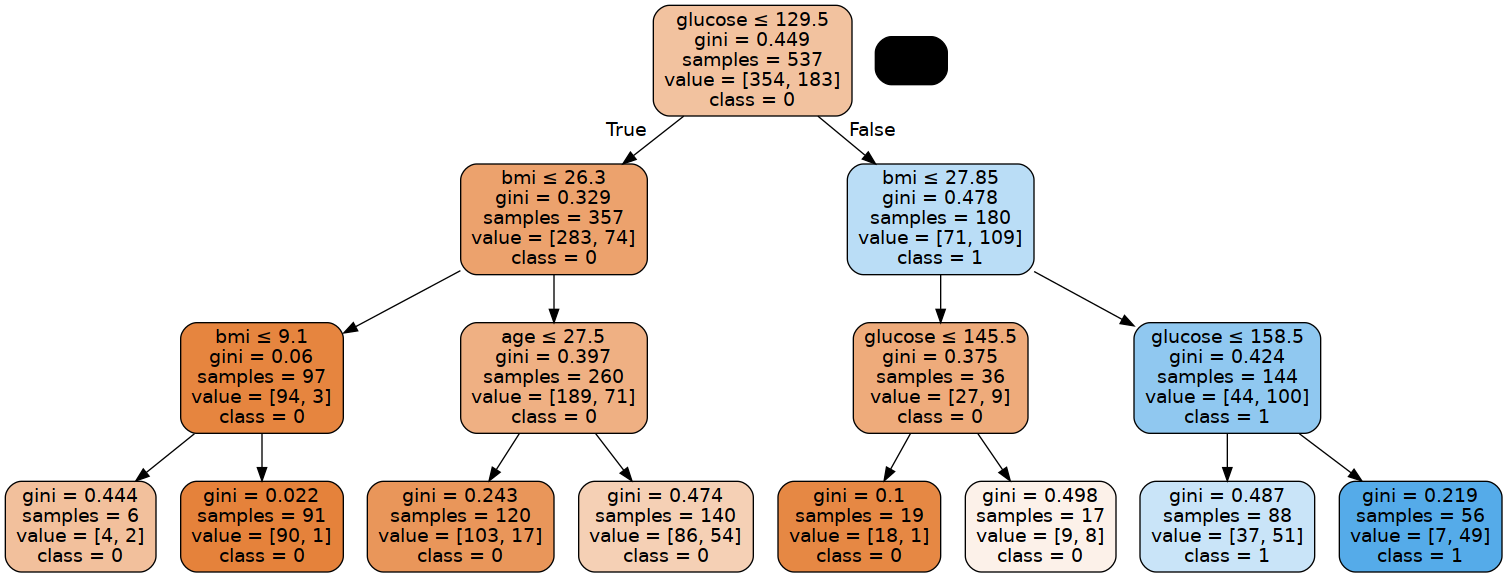

In [21]:
dot_data = StringIO()
export_graphviz(clf, 
                out_file=dot_data,  
                filled=True, 
                rounded=True,
                special_characters=True,
                feature_names = feature_cols,
                class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png(), retina=True)

In [22]:
# 정보이득이 되지 않고 남은 Impurity  총량 측정
ccp_path1 = clf.cost_complexity_pruning_path(X_train,y_train)
ccp_path2 = clf.cost_complexity_pruning_path(X_test,y_test)
print(np.mean(ccp_path1.impurities))
print(np.mean(ccp_path2.impurities))

0.3488385063866954
0.30877554783402966


In [25]:
for i in range(2,8):
    print(f"max_depth : {i}")
    clf = DecisionTreeClassifier(max_depth=i)
    clf = clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    ccp_path1 = clf.cost_complexity_pruning_path(X_train,y_train)
    ccp_path2 = clf.cost_complexity_pruning_path(X_test,y_test)
    print(np.mean(ccp_path1.impurities))
    print(np.mean(ccp_path2.impurities))

max_depth : 2
Accuracy: 0.7575757575757576
0.38182803619353806
0.35312931541057746
max_depth : 3
Accuracy: 0.7575757575757576
0.3488385063866954
0.30877554783402966
max_depth : 4
Accuracy: 0.7619047619047619
0.3145986855643172
0.2630241219744747
max_depth : 5
Accuracy: 0.7575757575757576
0.2869266374679069
0.22363096155130804
max_depth : 6
Accuracy: 0.7272727272727273
0.2641749668523954
0.18259227476103373
max_depth : 7
Accuracy: 0.7186147186147186
0.23053370976857077
0.15900226863045824
